## Restoring old images and paintings using an inpainting method

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
# OpenCV Utility Class for Mouse Handling
class Sketcher:
    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.show()
        cv2.setMouseCallback(self.windowname, self.on_mouse)

    def show(self):
        cv2.imshow(self.windowname, self.dests[0])
        cv2.imshow(self.windowname + ": mask", self.dests[1])

    # onMouse function for Mouse Handling
    def on_mouse(self, event, x, y, flags, param):
        pt = (x, y)
        if event == cv2.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv2.EVENT_LBUTTONUP:
            self.prev_pt = None

        if self.prev_pt and flags & cv2.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv2.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()

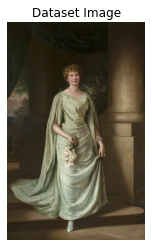

In [3]:
img = cv2.imread("SS_TCAT_H_4790-001.jpg", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Dataset Image")
plt.axis('off')
plt.show()

In [4]:
print("Usage: python inpaint")
print("Keys: ")
print("f - inpaint using FMM")
print("n - inpaint using NS technique")
print("r - reset the inpainting mask")
print("ESC - exit")

Usage: python inpaint
Keys: 
f - inpaint using FMM
n - inpaint using NS technique
r - reset the inpainting mask
ESC - exit


In [5]:
# Read image in color mode
img = cv2.imread("SS_TCAT_H_4790-001.jpg", cv2.IMREAD_COLOR)
 

# Create a copy of original image
img_mask = img.copy()
# Create a black copy of original image
# Acts as a mask
inpaintMask = np.zeros(img.shape[:2], np.uint8)
# Create sketch using OpenCV Utility Class: Sketcher
sketch = Sketcher('image', [img_mask, inpaintMask], lambda : ((255, 255, 255), 255))

while True:
    ch = cv2.waitKey()
    if ch == 27:
        break
    if ch == ord('f'):
        res = cv2.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
        cv2.imshow('Inpaint Output using FMM', res)
    if ch == ord('n'):
        res = cv2.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv2.INPAINT_NS)
        cv2.imshow('Inpaint Output using NS Technique', res)
    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()

print('Completed')
cv2.destroyAllWindows()

Completed


### **Dataset Image**
<h3 align = center>Original Image</h3>
<p align = 'center'><img src = "old-image-restoration/src/nbimage/orignal.png"></p>

### **Generated Input:**

<h3 align = center>Damaged Image</h3>
<p align = 'center'><img src = "old-image-restoration/src/nbimage/input.png"></p>

<h3 align = center>Mask</h3>
<p align = 'center'><img src = "old-image-restoration/src/nbimage/mask.png"></p>

### **Output:**

<h3 align = center>Image Restored Using NS</h3>
<p align = 'center'><img src = "old-image-restoration/src/nbimage/NS.png"></p>

<h3 align = center>Image Restored Using FMM</h3>
<p align = 'center'><img src = "old-image-restoration/src/nbimage/FMM.png"></p>

## Detect discriminating features in an image and find the best matching features in other images

In [6]:
alter1 = cv2.imread('16423588_e93cab4efa_m.jpg')
alter1 = cv2.cvtColor(alter1, cv2.COLOR_BGR2RGB)
alter2 = cv2.imread('59701263_923abdd55f.jpg')
alter2 = cv2.cvtColor(alter2, cv2.COLOR_BGR2RGB)

stain1 = cv2.imread('112862388_0c6d152acd_m.jpg')
stain1 = cv2.cvtColor(stain1, cv2.COLOR_BGR2RGB)
stain2 = cv2.imread('112862683_5491353daf_m.jpg')
stain2 = cv2.cvtColor(stain2, cv2.COLOR_BGR2RGB)

In [7]:
def plot_cv_img(input_image):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(input_image, cmap = 'gray')
    ax.set_title('Fetaure Matching')
    ax.axis('off')
    plt.show()

### ORB + Brute Force Matcher

No of feature match: 4


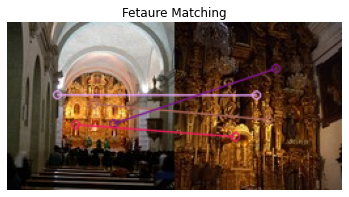

In [8]:
orb = cv2.ORB_create(nfeatures = 1000)
kp1, des1 = orb.detectAndCompute(alter1, None)
kp2, des2 = orb.detectAndCompute(alter2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_o_a = []
for m,n in matches:
    if m.distance < .8 * n.distance:
        good_o_a.append(m)
print("No of feature match:",len(good_o_a))
imgFeatures = cv2.drawMatches(alter1, kp1, alter2, kp2, good_o_a, None, flags=2)
plot_cv_img(imgFeatures)

No of feature match: 2


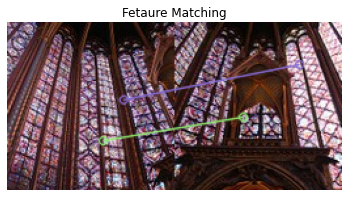

In [9]:
orb = cv2.ORB_create(nfeatures = 1000)
kp1_s, des1 = orb.detectAndCompute(stain1, None)
kp2, des2 = orb.detectAndCompute(stain2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_o_s = []
for m,n in matches:
    if m.distance < .8 * n.distance:
        good_o_s.append(m)
print("No of feature match:",len(good_o_s))
imgFeatures = cv2.drawMatches(stain1, kp1, stain2, kp2, good_o_s, None, flags=2)
plot_cv_img(imgFeatures)

### SIFT + Brute Force Matcher

No of feature match: 3


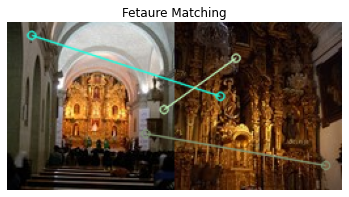

In [10]:
sift = cv2.SIFT_create(nfeatures = 1000)
kp1, des1 = sift.detectAndCompute(alter1, None)
kp2, des2 = sift.detectAndCompute(alter2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_s_b_a = []
for m,n in matches:
    if m.distance < .8 * n.distance:
        good_s_b_a.append(m)
print("No of feature match:",len(good_s_b_a))
imgFeatures = cv2.drawMatches(alter1, kp1, alter2, kp2, good_s_b_a, None, flags=2)
plot_cv_img(imgFeatures)

No of feature match: 40


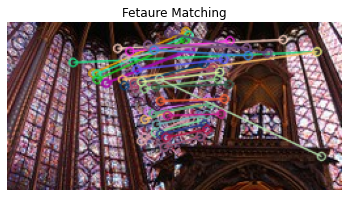

In [11]:
sift = cv2.SIFT_create(nfeatures = 1000)
kp1, des1 = sift.detectAndCompute(stain1, None)
kp2, des2 = sift.detectAndCompute(stain2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_s_b_s = []
for m,n in matches:
    if m.distance < .8 * n.distance:
        good_s_b_s.append(m)
print("No of feature match:",len(good_s_b_s))
imgFeatures = cv2.drawMatches(stain1, kp1, stain2, kp2, good_s_b_s, None, flags=2)
plot_cv_img(imgFeatures)

### SIFT + FLANN

No of feature match: 3


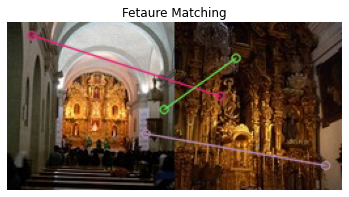

In [12]:
sift = cv2.SIFT_create(nfeatures = 1000)
kp1, des1 = sift.detectAndCompute(alter1, None)
kp2, des2 = sift.detectAndCompute(alter2, None)
bf = cv2.BFMatcher()
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
good_s_f_a = []
for m,n in matches:
    if m.distance < .8 * n.distance:
        good_s_f_a.append(m)
print("No of feature match:",len(good_s_f_a))
imgFeatures = cv2.drawMatches(alter1, kp1, alter2, kp2, good_s_f_a, None, flags=2)
plot_cv_img(imgFeatures)

No of feature match: 41


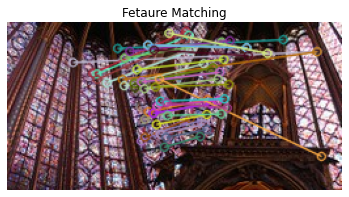

In [13]:
sift = cv2.SIFT_create(nfeatures = 1000)
kp1, des1 = sift.detectAndCompute(stain1, None)
kp2, des2 = sift.detectAndCompute(stain2, None)
bf = cv2.BFMatcher()
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
good_s_f_s = []
for m,n in matches:
    if m.distance < .8 * n.distance:
        good_s_f_s.append(m)
print("No of feature match:",len(good_s_f_s))
imgFeatures = cv2.drawMatches(stain1, kp1, stain2, kp2, good_s_f_s, None, flags=2)
plot_cv_img(imgFeatures)

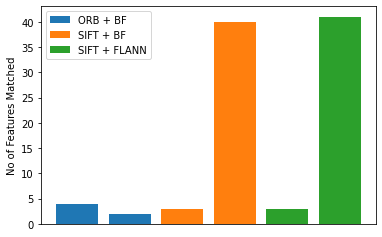

In [28]:
plt.bar([1, 2], [len(good_o_a), len(good_o_s)], label="ORB + BF")
plt.bar([3, 4], [len(good_s_b_a), len(good_s_b_s)], label="SIFT + BF")
plt.bar([5, 6], [len(good_s_f_a), len(good_s_f_s)], label="SIFT + FLANN")
plt.legend()
plt.ylabel("No of Features Matched")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

<font size = 4 color = 'fffff'>As we can See that SIFT With Flann Performs marginally better when compared to ORB + Brute Force, SIFT + Brute Force and SIFT + FLANN</font>